# 비트코인 시세 예측하기 


#### 이재윤
#### 블로그: https://speedanddirection.tistory.com/87


이번엔 2021년 최신 자료로 비트코인 시세 예측을 해보려고 한다. 저번에는 예전 자료로 시세 예측을 했었지만 최근 자료가 인터넷에 있어 이번코드는 최신 자료로 시세예측을 해보려고 한다. 이것이 데이터 분석이다 with 파이썬의 ch2의 내용을 참조하였다.

- 출처 : 파이썬으로 데이터 주무르기(ch.2 서울시 범죄 현황 분석)

### Step.1 시간 정보가 포함된 데이터 살펴보기

우선 비트코인 데이터를 탐색하자. 아래 결과와 같이 날짜와 가격에 대한 2개의 컬럼으로 구성되어 있다. 이러한 데이터셋을 시계열 데이터셋이라고 한다.

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/home/jaeyoon89/python_data_analysis_study/market-price_2021.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day','price'])

print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(366, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
361,2021-04-15 0:00,62969.12
362,2021-04-16 0:00,63252.63
363,2021-04-17 0:00,61455.98
364,2021-04-18 0:00,60087.09
365,2021-04-19 0:00,56251.48


그리고 아래의 코드는 시계열 정보를 데이터 프레임의 index로 설정하여 가격의 추이를 시각화한 것이다.

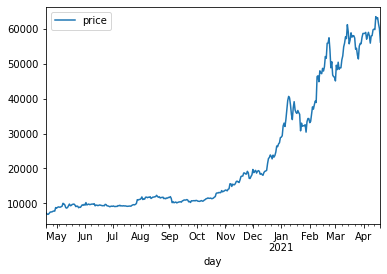

In [17]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

bitcoin_df.plot()
plt.show()

### Step.2 파이썬 라이브러리를 활용해 시세 예측하기



첫 번째로 사용할 시계열 예측 분석 방법은 ARIMA 분석 방법이다. ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있다. 첫 번째는 AR모델로 자기 자신의 과거를 정보로 사용하는 것이다. 두 번째 개념은 MA모델로 '이전 항에서의 오차를 이용하여 현재 항의 상태를 추론하겠다' 라는 방법이다. 그리고 이 둘을 합친 것을 ARMA 모델이라고 하며, 조금 더 나아간 ARIMA 모델은 ARMA 모델에 추세 변동의 경향성까지 반영한 방법이다.

- ARIMA 모델 활용하기 : 모델 학습

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/home/jaeyoon89/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3088.058
Method:                       css-mle   S.D. of innovations           1135.356
Date:                Mon, 17 May 2021   AIC                           6188.115
Time:                        21:29:18   BIC                           6211.515
Sample:                             1   HQIC                          6197.414
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.0771     59.089      2.269      0.023      18.264     249.890
ar.L1.D.y     -0.5844      0.016    -37.441      0.000      -0.615      -0.554
ar.L2.D.y     -0.9752      0.015    -66.470      0.0

/home/jaeyoon89/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/jaeyoon89/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  war

다음으로 ARIMA 모델의 학습 결과를 알아보자. 아래의 실행 결과 중 첫 번째 그래프는 학습한 모델에 학습 데이터셋을 넣었을 때의 시계열 예측 결과이다.

- ARIMA 모델 활용하기 : 모델의 성능 & 예측 결과 시각화

<AxesSubplot:>

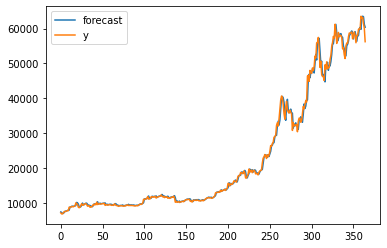

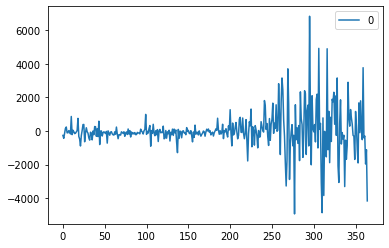

In [19]:
fig = model_fit.plot_predict() 
residuals = pd.DataFrame(model_fit.resid) 
residuals.plot()

첫 번째 그래프는 실제값과 예측값의 차이를 두 가지 색의 그래프로 표현한 것이다. 거의 비슷한 것을 볼 수 있다.

두 번째 그래프는 실제값과 예측값 사이의 오차 변동을 나타내는 그래프이다. 만약 이 그래프 폭이 일정하다면 좋은 예측 모델을 학습시킨 것이라고 생각할 수 있다. 하지만 실행 결과에서는 오차 변동이 매우 불안정하다. 
다음으로 ARIMA 모델을 평가해보자. 모델을 평가하기 위해서는 테스트 전용 데이터가 필요한데 이번 예제에서는 5일 동안의 미래를 테스트 데이터로 사용하자.

- ARIMA 모델 활용하기 : 실제 데이터와의 비교

In [43]:
forecast_data = model_fit.forecast(steps=366) # 학습 데이터셋으로부터 5일 뒤를 예측.

test_file_path = '/home/jaeyoon89/python_data_analysis_study/market-price_2021.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data[0].tolist() 
test_y = bitcoin_test_df.y.values 
pred_y_lower = [] 
pred_y_upper = [] 
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

그리고 다음 코드는 이를 그래프로 시각화한 것이다. 파란색은 모델이 예상한 최고 가격, 빨간색은 모델이 예측한 하한가 그래프이고, 초록색은 실제 5일 간의 가격 그래프, 노란색은 모델이 예측한 5일간의 가격 그래프를 나타낸 것이다.


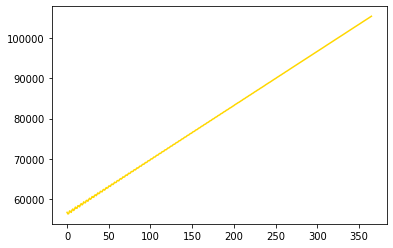

In [44]:
plt.plot(pred_y, color="gold")

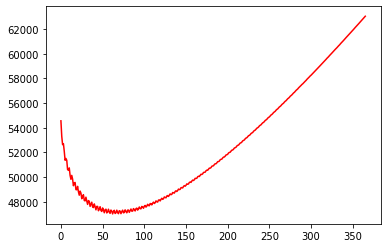

In [45]:
plt.plot(pred_y_lower, color="red")

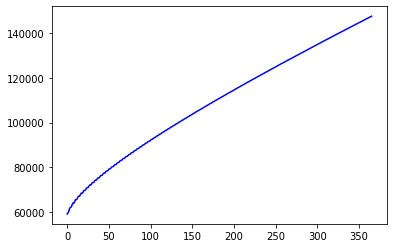

In [46]:
plt.plot(pred_y_upper, color="blue") 

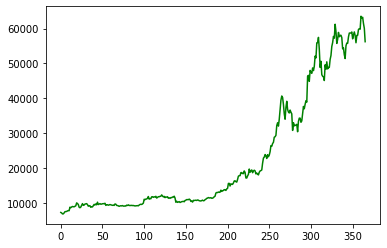

In [47]:
plt.plot(test_y, color="green") 

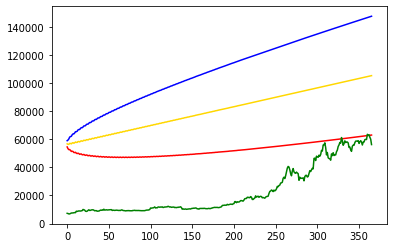

In [48]:
plt.plot(pred_y, color="gold")
plt.plot(pred_y_lower, color="red")
plt.plot(pred_y_upper, color="blue") 
plt.plot(test_y, color="green")

아래는 상한가와 하한가를 제외한 뒤 그래프를 살펴보았다. 그래프의 상승 경향을 살펴보면 그다지 좋지 않은 예측을 한 것으로 보인다. 하지만 5일동안 상승할 것이다 라는 아주 큰 트렌드는 예측할 수 있었다.

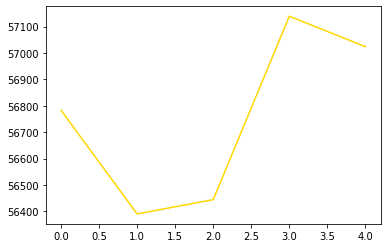

In [27]:
plt.plot(pred_y, color="gold")
# plt.plot(test_y, color="green")

In [42]:
len(pred_y)

3664

In [41]:
test_y

array([ 7259.36,  7130.04,  6840.24,  6852.52,  7130.99,  7477.6 ,
        7507.08,  7549.52,  7699.27,  7790.66,  7765.33,  8777.63,
        8628.77,  8824.66,  8973.82,  8903.95,  8885.93,  9030.96,
        9170.79, 10002.48,  9821.8 ,  9527.39,  8754.46,  8617.25,
        8814.53,  9305.93,  9790.31,  9303.59,  9385.7 ,  9669.4 ,
        9719.37,  9785.74,  9510.67,  9057.57,  9167.26,  9178.32,
        8730.73,  8899.66,  8842.85,  9197.54,  9569.21,  9425.98,
        9698.1 ,  9450.84, 10204.23,  9525.57,  9658.04,  9794.56,
        9623.75,  9670.43,  9753.85,  9782.59,  9775.15,  9892.13,
        9286.42,  9459.97,  9473.5 ,  9330.07,  9426.7 ,  9526.  ,
        9454.81,  9380.03,  9300.15,  9357.43,  9284.78,  9691.9 ,
        9621.49,  9276.58,  9240.85,  9154.45,  9004.23,  9127.47,
        9185.35,  9133.97,  9236.38,  9087.98,  9072.42,  9131.31,
        9089.09,  9348.91,  9256.23,  9440.07,  9238.04,  9287.4 ,
        9235.96,  9295.9 ,  9238.13,  9254.52,  9193.51,  9131

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [3664, 366]

이번엔 ARIMA보다 조금 더 정확한 트렌드 예측 분석을 제공하는 라이브러리 'FacebookProphet'을 사용하자. fbprophet 라이브러리를 사용하기 위해선 데이터 프레임의 피처를 'ds'와 'y'로 변경해야 한다. 그리고 Prophet이라는 클래스를 선언한 뒤, fit() 함수로 모델을 학습시킨다. 모델 생성에 포함되는 파라미터의 의미는 다음과 같다.

- seasonality_mode : 연간,월간,주간,일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터이다.
- changepoint_prior_scale : 트렌드가 변경되는 문맥을 반영하는 파라미터이다. 수치가 높을수록 모델은 과적합에 가까워진다.


- Facebook Prophet 활용하기

In [22]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [23]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

다음 코드 중 make_future_dataframe(periods-5,freq='d'), prophet.predict(future_data) 를 실행하면 학습 데이터셋 기반의 5일 단위 예측 데이터를 얻을 수 있다.

In [24]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [25]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
366,2021-04-20,4280.912733,55131.720145,58209.226449,4280.912733,4280.912733,4.96344,4.96344,4.96344,12.226201,...,-0.007241,-0.007241,-0.007241,7.270002,7.270002,7.270002,0.0,0.0,0.0,56620.212159
367,2021-04-21,3984.900207,52832.971660,56219.640000,3984.900207,3984.900207,4.96344,4.96344,4.96344,12.683039,...,-0.015985,-0.015985,-0.015985,7.735584,7.735584,7.735584,0.0,0.0,0.0,54525.546308
368,2021-04-22,3688.887681,50381.555348,53924.294973,3688.887681,3689.888850,4.96344,4.96344,4.96344,13.143047,...,0.007527,0.007527,0.007527,8.172080,8.172080,8.172080,0.0,0.0,0.0,52172.110534
369,2021-04-23,3392.875156,47393.693226,51298.284620,3380.222217,3417.776535,4.96344,4.96344,4.96344,13.532728,...,-0.004107,-0.004107,-0.004107,8.573395,8.573395,8.573395,0.0,0.0,0.0,49307.730155
370,2021-04-24,3096.862630,44014.880299,48242.216318,3052.264477,3148.860025,4.96344,4.96344,4.96344,13.907562,...,0.010352,0.010352,0.010352,8.933770,8.933770,8.933770,0.0,0.0,0.0,46166.672289


In [26]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-04-20,56620.212159,55131.720145,58209.226449
367,2021-04-21,54525.546308,52832.971660,56219.640000
368,2021-04-22,52172.110534,50381.555348,53924.294973
369,2021-04-23,49307.730155,47393.693226,51298.284620
370,2021-04-24,46166.672289,44014.880299,48242.216318


다음은 fbprophet 모델의 학습 결과를 시각화한 결과이다. 그래프의 검은점은 실제 가격을 파란 선은 예측 가격을 나타낸 것이다.

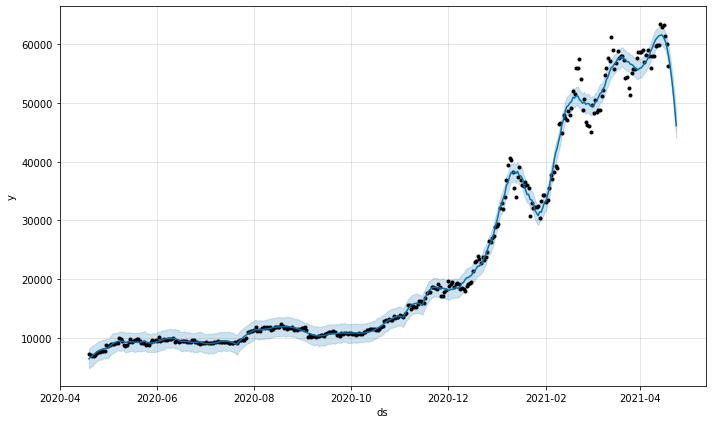

In [27]:
fig1 = prophet.plot(forecast_data)

그리고 다음의 그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능하다.

/home/jaeyoon89/.local/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/jaeyoon89/.local/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/jaeyoon89/.local/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


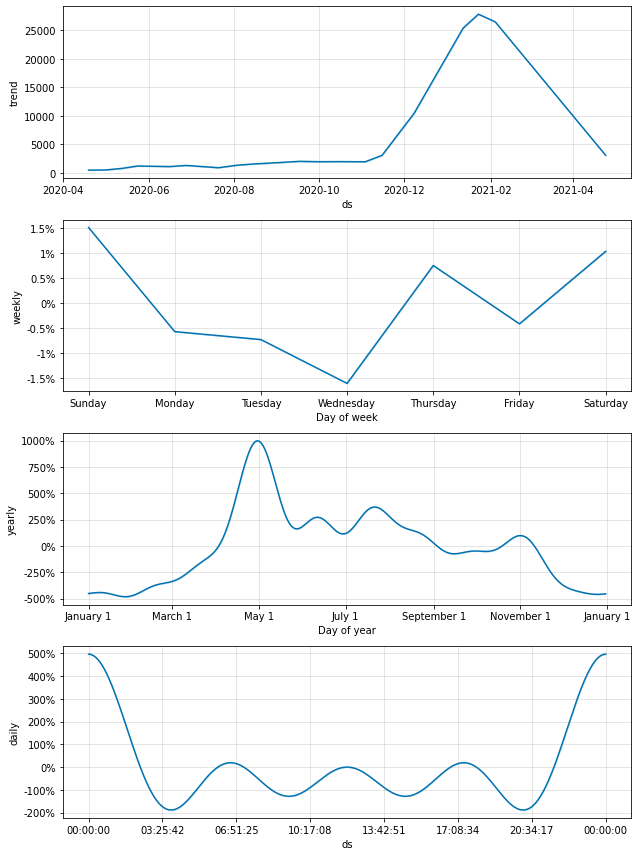

In [28]:
fig2 = prophet.plot_components(forecast_data)

ARIMA 모델을 평가한 것과 동일한 방법으로 테스트 데이터셋을 평가해보자. 아래 코드 실행 결과 ARIMA 모델보다는 prophet 모델이 실제 price값에 더 근접한 예측을 하는 것처럼 보인다.

- Facebook Prophet 활용하기 : 실제 데이터와의 비교


In [29]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds','y'])

pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

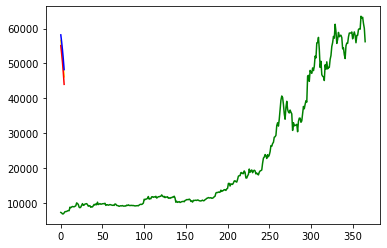

In [30]:
plt.plot(pred_y, color="gold") 
plt.plot(pred_y_lower, color="red")
plt.plot(pred_y_upper, color="blue") 
plt.plot(test_y, color="green")

다음으로 이 모델의 Test RMSE를 ARIMA 모델과 비교해 보자.

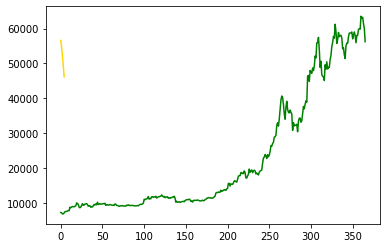

In [31]:
plt.plot(pred_y, color="gold")
plt.plot(test_y, color="green")

In [32]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [5, 366]

### step.3 활용: 더 나은 결과를 위한 방법



이번 분석 단계에서는 모델의 성능을 조금 더 향상시킬 수 있는 방법들에 대해 알아보자.
첫 번째로 고려해볼 방법은 상한값 혹은 하한값을 지정해 주는 것이다. 바닥과 천장이 없는 주가 데이터의 경우에는 의미가 없을 수 있지만 일반적인 시계열 데이터에서는 상한값 혹은 하한값을 설정해 주는 것이 모델의 성능을 높여줄 수 있는 방법 중 하나이다.

- 상한가 및 하한가 설정하기

In [89]:
bitcoin_df = pd.read_csv(file_path, names=['ds','y'])

bitcoin_df['cap'] = 20000

prophet = Prophet(seasonality_mode='multiplicative', 
                  growth='logistic',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

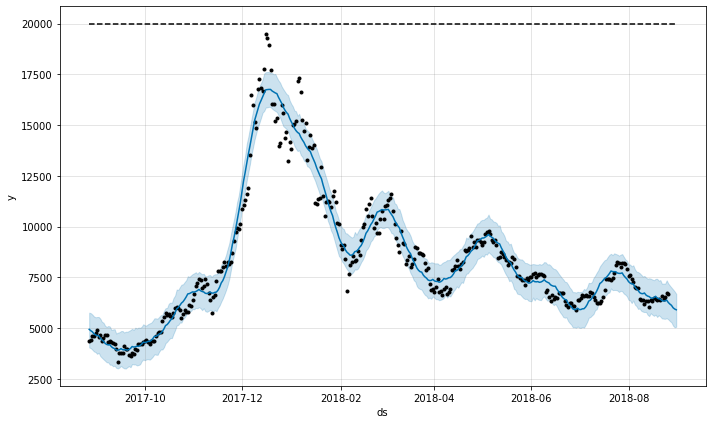

In [90]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')

future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

이번엔 아래의 코드로 예측값과 실제값을 비교해보자.

- 예측과 실제 비교 그래프

In [91]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds','y'])

pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

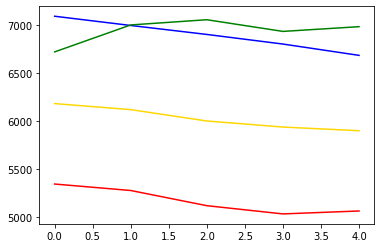

In [92]:
plt.plot(pred_y, color="gold") 
plt.plot(pred_y_lower, color="red") 
plt.plot(pred_y_upper, color="blue") 
plt.plot(test_y, color="green")

위와 같이 형편없는 결과를 예측했다는 것을 알 수 있다. 상한가라는 개념이 큰 의미가 없는 비트코인 데이터의 경우에는 상한선을 설정한 것이 오히려 독이 되었다고 볼 수 있다.

이제 모델의 성능을 향상시키는 다른 방법 중 하나인 이상치 제거 기법을 살펴보자. 이상치란 평균적인 수치에 비해 지나치게 높거나 낮은 수치의 데이터를 의미한다.
fbprophet 모델이 이상치를 제거한 데이터로 학습하려면 이상치에 해당하는 데이터를 None으로 설정해 주면 된다. 아래 코드에선 18000 이상을 이상치라 설정하였다.

- 이상치 제거하기

In [93]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

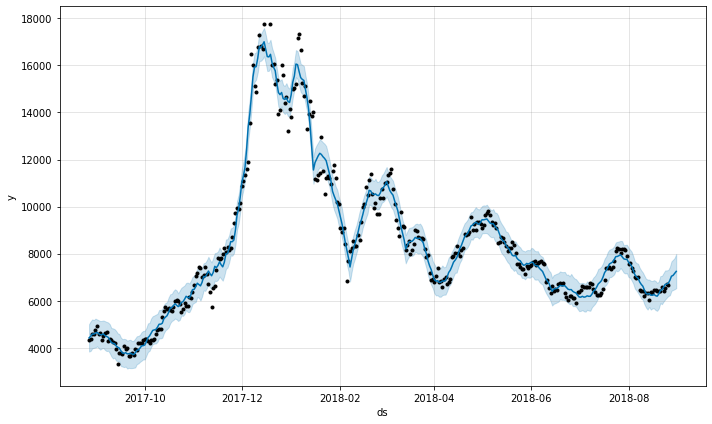

In [94]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df)

future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

마찬가지 방법으로 예측값과 실제값을 그래프로 나타내보자.

In [96]:
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

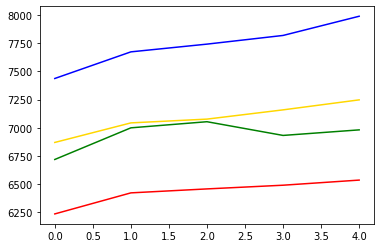

In [97]:
plt.plot(pred_y, color="gold") 
plt.plot(pred_y_lower, color="red") 
plt.plot(pred_y_upper, color="blue") 
plt.plot(test_y, color="green")

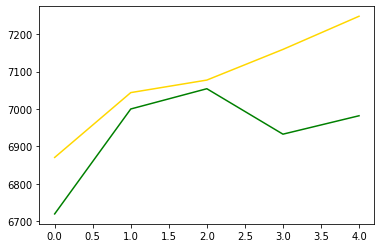

In [100]:
plt.plot(pred_y, color="gold")
plt.plot(test_y, color="green")

In [101]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

171.83159828333595


이를 살펴본 결과, 이상치를 제거하는 것이 정확도(RMSE) 면에서는 떨어지지만 '트렌드'를 예측하는 측면에서는 이전 모델보다 낫다고 할 수 있다.

출처 : 이것이 데이터 분석이다.